In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_1samp, sem, ttest_ind, t, f_oneway, f
import matplotlib.pyplot as plt
import seaborn as sns
import random

## Hypothesis Testing

Hypothesis Test:

$$
H_0 : \mu\leq10
$$
$$
H_1 : \mu> 10
$$

In [ ]:
dof = 999# n -1
significance_level = 0.05
crit_t_value = t.ppf(1-significance_level, dof) # not sig/2 because not two sided
print(f"Critical t value: {crit_t_value}")

Critical t value: 1.646380345427535


In [ ]:
 t_value = 32
 p_value = 1 - t.cdf(t_value, dof)
 print(f"The p value for this test is : {p_value}")

The p value for this test is : 0.0


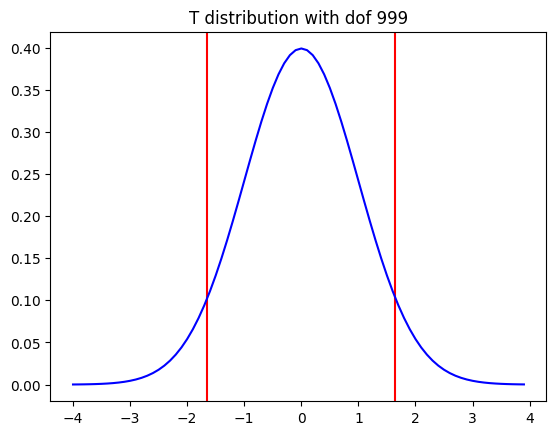

In [ ]:
x = np.arange(-4,4,0.1)
t_dist = t.pdf(x,dof)
# plt.axvline(x=t_value,  color = 'green')
plt.axvline(crit_t_value, color = 'red')
plt.axvline(-crit_t_value, color = 'red')
plt.title(f"T distribution with dof {dof}")
plt.plot(x, t_dist, 'blue')


In [ ]:
# Set the significance level
alpha = 0.05

print("p value for this test is {}".format(p_value))
print()
# If the p-value is less than the significance level,
# then we can reject the null hypothesis and conclude that the difference
# in conversion rates is statistically significant
if p_value < significance_level:
    print("""The results of this hypothesis test are statistically significant.
Therefore we can conclude there is evidence that the new product will increase sales
by at least 10%""")
else:
   print("""The results of this hypothesis test are not statistically significant.
Therefore we can conclude there is not evidence that the new product will increase sales
by at least 10%.""")

p value for this test is 0.0

The results of this hypothesis test are statistically significant. 
Therefore we can conclude there is evidence that the new product will increase sales 
by at least 10%


## AB Testing

Hypothesis Test formulation:

The null hypothesis is that the proportion of clicks is the same in both strategies. The alternative hypothesis is that the proportion of clicks is higher in strategy B than in strategy A.


$$
H_0 : p_A = p_B
$$
$$
H_1 : p_B > p_A
$$

Test statistic for t test for proportions

$$ t = \frac{(p_A - p_B)}{\sqrt{\frac{p_A(1-p_A)}{n_A} + \frac{p_B(1-p_B)}{n_B}}}$$

In [ ]:
# step 4 : calculate p values and/or critical t stat/values.
dof = 9998# nA - 1 + nB - 1
significance_level = 0.01
crit_t_value = t.ppf(1-significance_level, dof) # not sig/2 because not two sided
print(f"Critical t value: {crit_t_value}") # t_alpha

Critical t value: 2.3267209132887694


In [ ]:
 t_stat = -2.4119 # plug in for pA = 200/5000 pB = 250/5000above
 p_value = t.cdf(t_stat, dof)
 print(f"The p value for this test is : {p_value}")

The p value for this test is : 0.0079437660499081


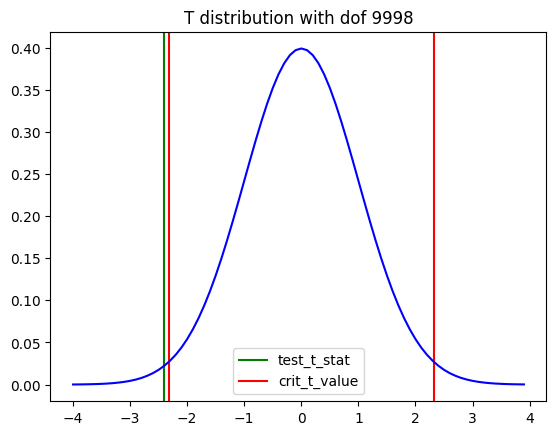

In [ ]:
x = np.arange(-4,4,0.1)
t_dist = t.pdf(x,dof)
plt.axvline(x=-2.4119,  color = 'green', label = 'test_t_stat')
plt.axvline(crit_t_value, color = 'red')
plt.axvline(-crit_t_value, color = 'red', label = 'crit_t_value')
plt.title(f"T distribution with dof {dof}")
plt.legend()
plt.plot(x, t_dist, 'blue')


In [ ]:
# Set the significance level
alpha = 0.01

print("p value for this test is {}".format(p_value))
print()
# If the p-value is less than the significance level,
# then we can reject the null hypothesis and conclude that the difference
# in conversion rates is statistically significant
if p_value < significance_level: # if t_stat < crit_t_value:
    print("""The results of this hypothesis test are statistically significant.
Therefore we can conclude there is evidence that the sales for strategy B
will result in more sales that strategy A""")
else:
    print("""The results of this hypothesis test are not statistically significant.
Therefore we can conclude there is not evidence that the sales for strategy B
will result in more sales that strategy A""")

p value for this test is 0.0079437660499081

The results of this hypothesis test are statistically significant.
Therefore we can conclude there is evidence that the sales for strategy B
will result in more sales that strategy A


## Anomaly Detection

In [ ]:
# Import the necessary libraries.
from sklearn.ensemble import IsolationForest

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report

# Load the dataset.
df = pd.read_csv('sample_data/creditcard.csv')

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# remove any null values that occur in the target
y = df.Class.values
df = df[~df['Class'].isna()]

y.mean()

0.001727485630620034

In [ ]:
df.Time.values[:10]

array([0., 0., 1., 1., 2., 2., 4., 7., 7., 9.])

In [ ]:
# gather the training feats
training_feats = [f'V{j}' for j in range(1, 29)]
df[training_feats]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533


In [ ]:
# create your indicator variables
# and target variable
X = df[training_feats]

y = df.Class.values

In [ ]:
# Split the dataset into a training set and a test set.
X_train, X_val, y_train, y_val = train_test_split(df, y, stratify = y, test_size=0.25)


In [ ]:
# Train the isolation forest model on the training set.
clf = IsolationForest()
clf.fit(X_train)

IsolationForest()

In [ ]:
# Evaluate the model on the test set.
y_pred = clf.predict(X_train)
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00    213236
           1       0.00      0.16      0.00       369

    accuracy                           0.00    213605
   macro avg       0.00      0.05      0.00    213605
weighted avg       0.00      0.00      0.00    213605



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
# Evaluate the model on the test set.
y_pred = clf.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.00      0.00      0.00     71079
           1       0.00      0.13      0.00       123

    accuracy                           0.00     71202
   macro avg       0.00      0.04      0.00     71202
weighted avg       0.00      0.00      0.00     71202



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [ ]:
# Identify the anomalies in the test set.
anomalies = clf.predict(X_train) == -1
print(anomalies)

[False False False ... False False False]


## MCQ

Number 11

In [ ]:
# test statistic is -2

dof = 99# n -1
significance_level = 0.01
crit_t_value = t.ppf(1-significance_level/2, dof) # not sig/2 because not two sided
print(f"Critical t value: {crit_t_value}")

Critical t value: 2.6264054563851857


In [ ]:
 t_stat = -2
 p_value = t.cdf(t_stat, dof)
 print("Probability of committing a type 1 error is {}" .format(p_value * 2))

Probability of committing a type 1 error is 0.04823969337263297


Number 13

In [ ]:
dof = 998# nA -1 + nB -1
significance_level = 0.05 # we chose 0.05 because of the 95% confidence.
crit_t_value = t.ppf(1-significance_level/2, dof) # sig/2 because not two sided
print(f"Critical t value: {crit_t_value}")

Critical t value: 1.9623438462163336


In [ ]:
 t_stat = 1.00 # use the two sample t proportions test with equal sized samples
 p_value =  1- t.cdf(t_stat, dof)
 print("The p-value in this case is: {}".format(p_value * 2))

The p-value in this case is: 0.3175529027531847


In [ ]:
if p_value < significance_level: #
    print("""There is a significant difference between the conversion rates of the two designs at the 95% confidence level""")
else:
    print("""There is not a significant difference between the conversion rates of the two designs at the 95% confidence level""")

There is not a significant difference between the conversion rates of the two designs at the 95% confidence level


In [ ]:
if t_stat > crit_t_value: #
    print("""There is a significant difference between the conversion rates of the two designs at the 95% confidence level""")
else:
    print("""There is not a significant difference between the conversion rates of the two designs at the 95% confidence level""")

There is not a significant difference between the conversion rates of the two designs at the 95% confidence level
